In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.shape

(545, 13)

In [5]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [18]:
df['mainroad'].value_counts()
# yes  468
# no   77
# after Label Encoding
# 1    468
# 0    77

yes    468
no      77
Name: mainroad, dtype: int64

In [19]:
df['guestroom'].value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [20]:
df['basement'].value_counts()

no     354
yes    191
Name: basement, dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
cat_cols=[i for i in df.columns if df[i].dtypes=='object']
print(cat_cols)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [27]:
lb=LabelEncoder()
for i in cat_cols:
    df[i]=lb.fit_transform(df[i])

In [28]:
df.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int32
guestroom           int32
basement            int32
hotwaterheating     int32
airconditioning     int32
parking             int64
prefarea            int32
furnishingstatus    int32
dtype: object

In [29]:
df['mainroad'].value_counts()

1    468
0     77
Name: mainroad, dtype: int64

In [30]:
df['guestroom'].value_counts()

0    448
1     97
Name: guestroom, dtype: int64

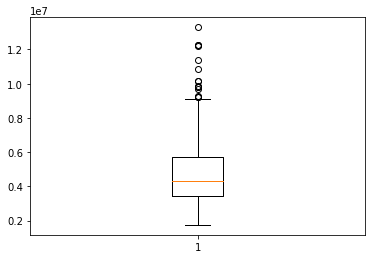

In [32]:
plt.boxplot(df['price'])
plt.show()

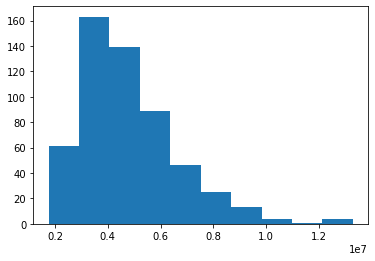

In [34]:
plt.hist(df['price'])
plt.show()

In [35]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

### Correlation
1) It gives the strength and direction of linear relationship between 2 or more variables.<br>
2) Correlation varies b/w -1 and 1.
3) Positive Correlation b/w x and y implies<br>
       
            a)If x increases -> y also increases
            b)If x decreases -> y also decreases
            
4) Negative Correlation b/w x and y implies<br>
       
            a)If x increases -> y decreases
            b)If x decreases -> y increases
5) Corr(x,y) = (Sum((xi-xmean)*(yi-ymean))/(sqrt(sum(xi-xmean)^2)*sum(yi-ymean)^2)) 
  corr(x,y)=corr(y,x)<br>
  corr(x,x)=corr(y,y)=1 

In [37]:
corr=df.corr()
corr

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


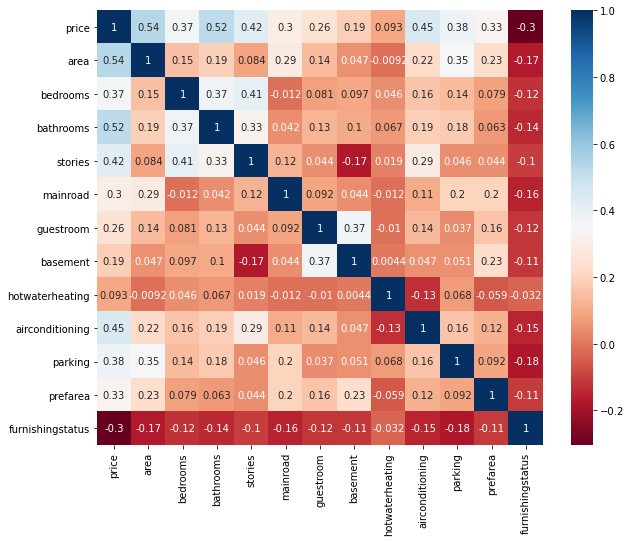

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

In [39]:
corr['price'].sort_values(ascending=False)

price               1.000000
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
furnishingstatus   -0.304721
Name: price, dtype: float64

In [40]:
x=df.iloc[:,1:-1]
y=df['price']
print(x.columns)

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking',
       'prefarea'],
      dtype='object')


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(408, 11)
(137, 11)
(408,)
(137,)


#### Build the Model

In [91]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [93]:
#res=pd.DataFrame(columns=['Model','MAE','MSE','RMSE','R2_Score'])
#res.head()

,Model,MAE,MSE,RMSE,R2_Score


In [125]:
def gen_metrics(y_test,ypred):
    mae=mean_absolute_error(y_test,ypred)
    mse=mean_squared_error(y_test,ypred)
    rmse=np.sqrt(mean_squared_error(y_test,ypred))
    r2s=r2_score(y_test,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2_Score',r2s)

#### Linear Regression

In [126]:
m1=LinearRegression()
m1.fit(x_train,y_train)

LinearRegression()

In [127]:
#R2 Score
print('Training Score',m1.score(x_train,y_train))
print('Testing Score',m1.score(x_test,y_test))

Training Score 0.6624598720846016
Testing Score 0.6858941649202925


In [135]:
gen_metrics(y_test,ypred_m1)

MAE 807810.7382983872
MSE 1190709440713.895
RMSE 1091196.334631809
R2_Score 0.6858941649202925


In [136]:
ypred_m1=m1.predict(x_test)

In [130]:
#m1_perf={'Model':'Lin_Reg','MAE':mae,'MSE':mse,'RMSE':rmse,'R2_Score':r2s}
#res.append(m1_perf,ignore_index=True)
#res.head()

#### Decision Tree Regression

In [131]:
m2=DecisionTreeRegressor(criterion='mse',max_depth=9,min_samples_split=10)
m2.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=9, min_samples_split=10)

In [132]:
#R2 Score
print('Training Score',m2.score(x_train,y_train))
print('Testing Score',m2.score(x_test,y_test))

Training Score 0.7922225469195889
Testing Score 0.4164458362080137


In [133]:
ypred_m2=m2.predict(x_test)

In [134]:
gen_metrics(y_test,ypred_m2)

MAE 1083686.2317933885
MSE 2212131626968.0166
RMSE 1487323.6456696359
R2_Score 0.4164458362080137


#### Random Forest Regression

In [76]:
m3=RandomForestRegressor(n_estimators=150,criterion='mse')
m3.fit(x_train,y_train)

RandomForestRegressor(n_estimators=150)

In [77]:
#R2 Score
print('Training Score',m3.score(x_train,y_train))
print('Testing Score',m3.score(x_test,y_test))

Training Score 0.9425578101334692
Testing Score 0.6058625603816999


In [78]:
ypred_m3=m3.predict(x_test)

In [79]:
gen_metrics(y_test,ypred_m3)

MAE 868719.6386861313
MSE 1494092493293.6133
RMSE 1222330.7626389894
R2score 0.6058625603816999
